<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex011_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 깃허브에 있는 네이버 영화 리뷰 데이터 다운로드하기
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Counting objects: 100% (14762/14762), done.
remote: Compressing objects: 100% (13012/13012), done.
remote: Total 14763 (delta 1748), reused 14762 (delta 1748), pack-reused 1
Receiving objects: 100% (14763/14763), 56.19 MiB | 18.86 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (14737/14737), done.


In [4]:
# 한글 형태소 분류
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 51.2 MB/s eta 0:00:00


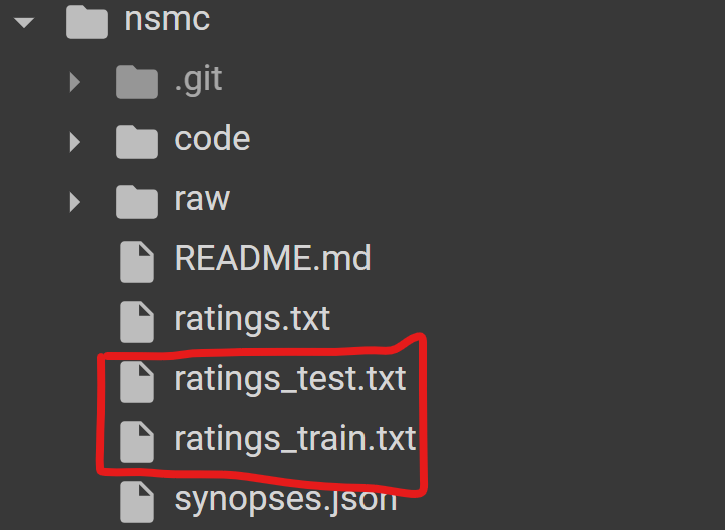

In [5]:
import pandas as pd

train_data = pd.read_table('/content/nsmc/ratings_train.txt')
test_data = pd.read_table('/content/nsmc/ratings_test.txt')

len(train_data), len(test_data)

(150000, 50000)

In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


## 전처리

In [ ]:
# train_data, test_data에서 결측치 제거해줘야한다
train_data.loc[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [6]:
# any : 행에서 하나라도 값이 비어있으면 해당 행을 삭제
train_data = train_data.dropna(how = 'any')

In [ ]:
test_data = test_data.dropna(how = 'any')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
# 한글과 공백을 제외하고 다른 값들은 제거
# ^ : 제외하고
# ㄱ-ㅎ : ㄱ부터 ㅎ까지
# ㅏ-ㅣ : ㅏ부터 ㅣ까지
# 가-힣 : 가부터 힣까지
# 즉 모든 한글을 제외하고 공백으로 바꿔준다.
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

<ipython-input-7-c67ac195a195>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
# 전처리후 값이 비어있는 데이터
# 주로 영어, 숫자, 특수문자, 이모티콘 등으로 이루어진 글
train_data.loc[train_data['document'] == ""]

,id,document,label
584,7117896,,0
593,6478189,,0
638,9364602,,0
668,1600635,,0
1058,5890638,,0
...,...,...,...
149358,6780491,,0
149364,8014701,,1
149718,7690797,,1
149862,7175749,,0


In [8]:
# 공백이 아닌 데이터들만 다시 저장
train_data = train_data[train_data['document'] != ""]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149186 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149186 non-null  int64 
 1   document  149186 non-null  object
 2   label     149186 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data = test_data[test_data['document'] != ""]
test_data.info()

<ipython-input-32-887fae8fdc93>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49726 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49726 non-null  int64 
 1   document  49726 non-null  object
 2   label     49726 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


## 형태소별로 분류

In [9]:
# 불용어 제거(의미 없는 단어)
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# 토큰화 : 문장을 형태소별로 나누는 작업

import konlpy # 형태소 분류기
from konlpy.tag import Okt # 그 중에 하나

X_train = []
okt = Okt()

for sentence in train_data['document']:
  temp_X = [] # 토큰화 결과를 저장할 임시 변수
  # 토큰화 morphs : 형태소 별로 구분
  # stem : 일정 수준의 정규화(기본형태로 바꿈) 진행(먹다, 먹는다, 먹겠다, 먹었다 > 먹다)
  temp_X = okt.morphs(sentence, stem = True)
  # 토큰화 된 값 중에서 불용어가 있으면 불용어 빼고 저장 / 리스트 내포
  temp_X = [word for word in temp_X if not word in stopwords]
  X_train.append(temp_X)


In [ ]:
# 불용어 제거(의미 없는 단어)
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# 토큰화 : 문장을 형태소별로 나누는 작업

import konlpy # 형태소 분류기
from konlpy.tag import Okt # 그 중에 하나

X_test = []
okt = Okt()

for sentence in test_data['document']:
  temp_X = [] # 토큰화 결과를 저장할 임시 변수
  # 토큰화 morphs : 형태소 별로 구분
  # stem : 일정 수준의 정규화(기본형태로 바꿈) 진행(먹다, 먹는다, 먹겠다, 먹었다 > 먹다)
  temp_X = okt.morphs(sentence, stem = True)
  # 토큰화 된 값 중에서 불용어가 있으면 불용어 빼고 저장 / 리스트 내포
  temp_X = [word for word in temp_X if not word in stopwords]
  X_test.append(temp_X)


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_feature = 35000

tokenizer = Tokenizer(num_words = max_feature) # 상위 35,000개의 단어만 사용
# 약 150만개 단어중에서 몇 번 안나온 단어들은 긍/부정을 판단하기가 애매 > 사용안함
# 3.5만개 단어 거르기
tokenizer.fit_on_texts(X_train)

# 3.5만개 단어만 숫자로 변경
X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.704737709972786


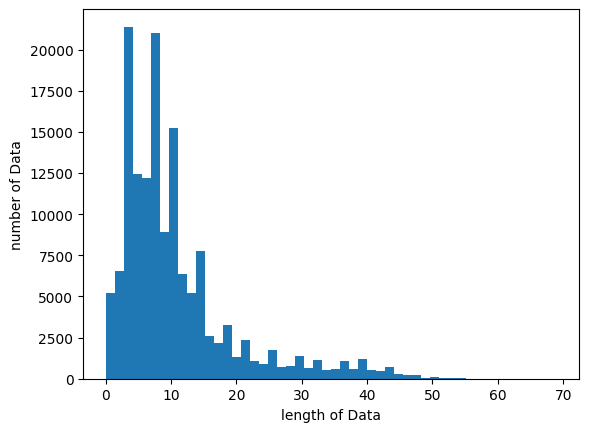

In [ ]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

# 리뷰의 평균 길이는 11
# 대다수의 리뷰를 사용하기 위해서 단어의 수는 30개로 제한할 예

In [ ]:
max_word = 30

# 리뷰의 길이를 30으로 통일
# 짧은 건 앞에 공백 채우기
# 긴 건 뒤에 단어 자르기
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen= max_word)
X_test = pad_sequences(X_test, maxlen = max_word)

In [ ]:
y_train = train_data['label']
y_test = test_data['label']

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_feature, 100 , input_length = max_word))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 10, batch_size = 60, validation_split = 0.2)

model.save('naver_review_analysis.h5')

Epoch 1/10
1990/1990 [==============================] - 49s 21ms/step - loss: 0.4075 - accuracy: 0.8123 - val_loss: 0.3680 - val_accuracy: 0.8366
Epoch 2/10
1990/1990 [==============================] - 16s 8ms/step - loss: 0.3428 - accuracy: 0.8509 - val_loss: 0.3529 - val_accuracy: 0.8450
Epoch 3/10
1990/1990 [==============================] - 17s 9ms/step - loss: 0.3154 - accuracy: 0.8667 - val_loss: 0.3364 - val_accuracy: 0.8526
Epoch 4/10
1990/1990 [==============================] - 15s 8ms/step - loss: 0.2907 - accuracy: 0.8801 - val_loss: 0.3375 - val_accuracy: 0.8533
Epoch 5/10
1990/1990 [==============================] - 16s 8ms/step - loss: 0.2683 - accuracy: 0.8927 - val_loss: 0.3554 - val_accuracy: 0.8493
Epoch 6/10
1990/1990 [==============================] - 15s 7ms/step - loss: 0.2471 - accuracy: 0.9029 - val_loss: 0.3463 - val_accuracy: 0.8517
Epoch 7/10
1990/1990 [==============================] - 14s 7ms/step - loss: 0.2274 - accuracy: 0.9128 - val_loss: 0.3591 - val_a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 23.11.01
## 마지막수업

In [2]:
# 모델 불러오기
from tensorflow.keras.models import load_model
new_model = load_model('/content/naver_review_analysis.h5')

## 학습시킬 데이터 전처리

In [16]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 입력할 리뷰
def preprocessing(word):
  pred_word = pd.Series([word])

  # 한글 제외하고 전부 다 삭제
  pred_word = pred_word.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

  # 토큰화 변수 생성
  pred = []
  temp_X = []

  # 입력한 리뷰를 형태소로 쪼개기 (토큰화) > 수치화
  temp_X = okt.morphs(pred_word[0], stem = True)
  temp_X = [word for word in temp_X if not word in stopwords]

  # 불용어 제거 후 저장
  pred.append(temp_X)

  # 정수 인코딩 (형태소 > 숫자)
  pred = tokenizer.texts_to_sequences(pred)

  # 리뷰 길이 맞추기, 30개의 단어로 맞춰준다

  max_word = 30
  return pad_sequences(pred, maxlen=max_word)

## 예측

In [25]:
word = '쓰레기같았지만 진짜 볼만했던 영화'
pred = preprocessing(word)
pred = new_model.predict(pred)
print(pred)
if pred > 0.5:
  print('긍정')

else:
  print('부정')

# 1. 지난주 진행한 흐름 복습
# 2. 예측시에도 학습 데이터와 동일한 전처리를 진행해야함

1/1 [==============================] - 0s 27ms/step
[[0.01283388]]
부정


<ipython-input-16-6b2d69c4e002>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  pred_word = pred_word.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
